In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()


Capitalización de Mercado:

In [34]:
coins_cap = cg.get_coins_markets(vs_currency="usd")
df_cap = pd.DataFrame(coins_cap)

columns = ['id', 'symbol', "current_price", "market_cap", "market_cap_rank", "total_volume"]
df_cap = df_cap[columns]


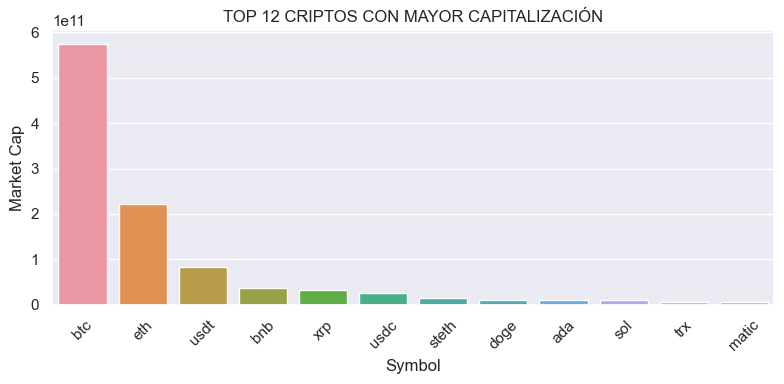

In [35]:
# Ordenar el DataFrame por capitalización de mercado de forma descendente
df_cap_sorted = df_cap.sort_values(by='market_cap', ascending=False)

top_12 = df_cap_sorted.head(12)

sns.set(style="darkgrid")

plt.figure(figsize=(8, 4))
sns.barplot(x='symbol', y='market_cap', data=top_12)
plt.xlabel('Symbol')
plt.ylabel('Market Cap')
plt.title('TOP 12 CRIPTOS CON MAYOR CAPITALIZACIÓN')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Cómo se relacionan el VOLUMEN con la CAPITALIZACIÓN?

In [86]:
price_y = cg.get_coin_market_chart_range_by_id(id="bitcoin", vs_currency="usd", from_timestamp="1609383600", to_timestamp="1640919600")
df_pr = pd.DataFrame(price_y)
df_pr.head()


,prices,market_caps,total_volumes
0,"[1609459200000, 29022.41839530417]","[1609459200000, 539438036435.6701]","[1609459200000, 43503516563.294876]"
1,"[1609545600000, 29352.12679194895]","[1609545600000, 545593282215.2498]","[1609545600000, 34089717988.090446]"
2,"[1609632000000, 32163.824935335215]","[1609632000000, 597887713053.5825]","[1609632000000, 57273436641.22308]"
3,"[1609718400000, 33008.226203489285]","[1609718400000, 613616917625.6967]","[1609718400000, 178894068361.35312]"
4,"[1609804800000, 31515.575966658354]","[1609804800000, 585726270248.7891]","[1609804800000, 74657165356.22716]"


In [87]:
df_pr[['prices_timestamp', 'prices_value']] = pd.DataFrame(df_pr['prices'].tolist(), index=df_pr.index)

# Separar los timestamps y los valores en las columnas 'market_caps'
df_pr[['market_caps_timestamp', 'market_caps_value']] = pd.DataFrame(df_pr['market_caps'].tolist(), index=df_pr.index)

# Separar los timestamps y los valores en las columnas 'total_volumes'
df_pr[['total_volumes_timestamp', 'total_volumes_value']] = pd.DataFrame(df_pr['total_volumes'].tolist(), index=df_pr.index)

# Eliminar las columnas originales que contenían las listas
df_pr.drop(['prices', 'market_caps', 'total_volumes'], axis=1)


,prices_timestamp,prices_value,market_caps_timestamp,market_caps_value,total_volumes_timestamp,total_volumes_value
0,1609459200000,29022.418395,1609459200000,5.394380e+11,1609459200000,4.350352e+10
1,1609545600000,29352.126792,1609545600000,5.455933e+11,1609545600000,3.408972e+10
2,1609632000000,32163.824935,1609632000000,5.978877e+11,1609632000000,5.727344e+10
3,1609718400000,33008.226203,1609718400000,6.136169e+11,1609718400000,1.788941e+11
4,1609804800000,31515.575967,1609804800000,5.857263e+11,1609804800000,7.465717e+10
...,...,...,...,...,...,...
360,1640563200000,50852.860260,1640563200000,9.617239e+11,1640563200000,1.963204e+10
361,1640649600000,50774.067815,1640649600000,9.602807e+11,1640649600000,2.279388e+10
362,1640736000000,47725.148046,1640736000000,9.026558e+11,1640736000000,2.953898e+10
363,1640822400000,46506.994648,1640822400000,8.743141e+11,1640822400000,2.634874e+10


In [88]:
df_pr.drop(['prices_timestamp', 'market_caps_timestamp', 'total_volumes_timestamp'], axis=1)
df_pr = df_pr.iloc[:10]

In [89]:
col = ['prices_value', 'market_caps_value', "total_volumes_value"]
df_pr = df_pr[col]
df_pr.head()

,prices_value,market_caps_value,total_volumes_value
0,29022.418395,5.394380e+11,4.350352e+10
1,29352.126792,5.455933e+11,3.408972e+10
2,32163.824935,5.978877e+11,5.727344e+10
3,33008.226203,6.136169e+11,1.788941e+11
4,31515.575967,5.857263e+11,7.465717e+10


In [90]:
import pandas as pd
import locale

# Establecer la localización para formatear con comas y dos decimales
locale.setlocale(locale.LC_ALL, '')

# Supongamos que 'df' es tu DataFrame con las columnas 'columna1' y 'columna2' en notación científica
df_pr['market_caps_value'] = df_pr['market_caps_value'].apply(lambda x: locale.format_string("%.2f", x, grouping=True))
df_pr['total_volumes_value'] = df_pr['total_volumes_value'].apply(lambda x: locale.format_string("%.2f", x, grouping=True))

In [91]:
df_pr.head()

,prices_value,market_caps_value,total_volumes_value
0,29022.418395,"539.438.036.435,67","43.503.516.563,29"
1,29352.126792,"545.593.282.215,25","34.089.717.988,09"
2,32163.824935,"597.887.713.053,58","57.273.436.641,22"
3,33008.226203,"613.616.917.625,70","178.894.068.361,35"
4,31515.575967,"585.726.270.248,79","74.657.165.356,23"


In [92]:
df_pr['total_volumes_value'] = df_pr['total_volumes_value'].str.replace('[,.]', '', regex=True).astype(float)
df_pr['market_caps_value'] = df_pr['market_caps_value'].str.replace('[,.]', '', regex=True).astype(float)

df_sorted = df_pr.sort_values(by='total_volumes_value')

df_sorted.to_csv("df_vol_cap.csv")

In [94]:
dff = pd.read_csv('df_vol_cap.csv')
dff["prices_value"] = dff["prices_value"].round(2)
dff.to_csv("df_vol_cap.csv")

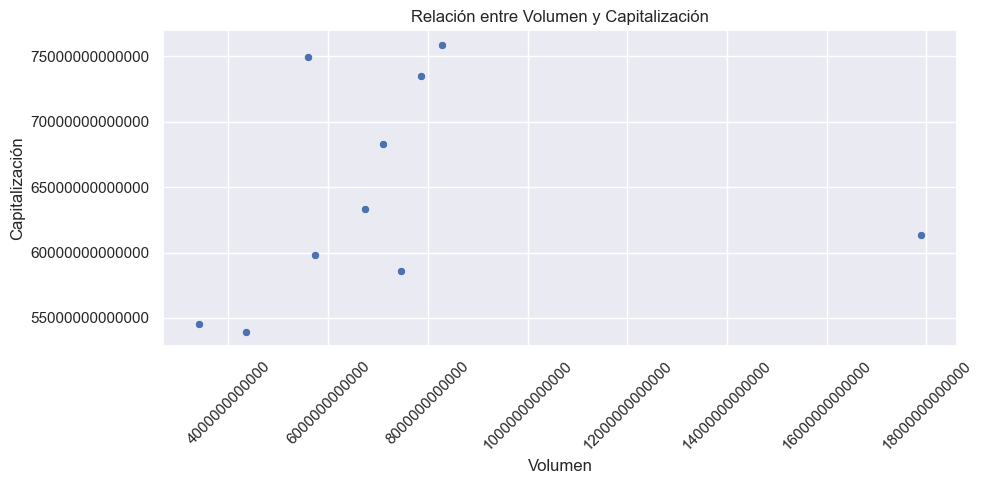

In [95]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=dff, x='total_volumes_value', y='market_caps_value')
plt.xlabel('Volumen')
plt.ylabel('Capitalización')
plt.title('Relación entre Volumen y Capitalización')

# Ajustar los números en el eje x para que no se superpongan
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='both')

plt.tight_layout()
plt.show()

Un aumento en el volumen de negociación pueden influir en la capitalización de mercado, aunque no siempre es así. Pero un supuesto puede ser que ante un aumento en el volumen se puede mejorar la liquidez y reducir la volatilidad en el mercado. Esto puede atraer a más inversionistas, lo que podría aumentar la capitalización de mercado. Pero, si el aumento en el volumen es causado por transacciones especulativas a corto plazo, la capitalización podría no experimentar un aumento sostenible. Esto es usual en el mercado cripto, por eso algunos valores no siguen la relación lineal.

Valores Atípicos/ Outliers.

Un valor atípico extremo puede representar un evento poco común o impactante que produce una gran fluctuación en los precios o rendimientos de un activo financiero. Estos eventos pueden aumentar la volatilidad en un período específico, ya que la volatilidad mide la magnitud de las fluctuaciones en los precios. Por ejemplo, un evento económico importante, como un anuncio de tasas inesperadas, puede generar valores atípicos en los precios de la cripto y aumentar la volatilidad durante ese período.

BITCOIN

In [4]:
# Precios de 2020 a 2021:

btc_21_22 = cg.get_coin_market_chart_range_by_id(id="bitcoin", vs_currency="usd", from_timestamp="1577761200", to_timestamp="1609383600")

df_bt = pd.DataFrame.from_records(btc_21_22['prices'], columns=['timestamp', 'price'])

df_bt['timestamp'] = pd.to_datetime(df_bt['timestamp'], unit='ms')

df_bt.to_csv("data_btc.csv", index=False)

df_bt['timestamp'] = pd.to_datetime(df_bt['timestamp'])

df_bt['timestamp'] = df_bt['timestamp'].dt.date

df_bt["price"] = df_bt["price"].round(2)

df_bt.to_csv("PreciosBtc_2020a2021.csv", index=False)

In [12]:
df_bt = pd.read_csv('PreciosBtc_2020a2021.csv')

In [13]:
# Busco si hay valores faltantes:
print(df_bt.isnull().sum())

# Medidas Estadísticas Generales:
estats = df_bt['price'].describe()
print(estats)

timestamp    0
price        0
dtype: int64
count      366.000000
mean     11052.200082
std       4214.210431
min       5032.500000
25%       8849.182500
50%       9700.135000
75%      11666.222500
max      28837.290000
Name: price, dtype: float64


In [23]:
df_bt['price'] = pd.to_numeric(df_bt['price'], errors='coerce')

# Calcular estadísticas descriptivas para identificar valores atípicos
desc_stats = df_bt['price'].describe()
Q1 = desc_stats['25%']
Q3 = desc_stats['75%']
IQR = Q3 - Q1

# Calcular los límites superior e inferior para detectar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar y filtrar valores atípicos
outliers = df_bt[(df_bt['price'] < lower_bound) | (df_bt['price'] > upper_bound)]

print(lower_bound)
print(upper_bound)
print(outliers.count())

4623.622499999998
15891.782500000001
timestamp    49
price        49
dtype: int64


De 366 valores, hay 49 outliers, eso puede ser un indicador de que existió bastante volatilidad de 2020 a 2021.
Para medir la volatilidad, podemos usar la fórmula de la volatilidad limitada a un rango:

In [24]:
media = 11052.20
des_st = 4214.21
volatilidad_limitada = (upper_bound - lower_bound) / (2 * des_st)
print("Volatilidad limitada en el rango de 2020 a 2021", volatilidad_limitada)

Volatilidad limitada en el rango de 2020 a 2021 1.336924358302031


Vemos que es mayor a 1, lo que indica que el rango de fluctuación de los precios es relativamente grande en relación con la dispersión de los datos.
Esto puede tener algunas implicaciones: mayor variabilidad en los precios, mayor riesgo pero posibles oportunidades para los que invierten a corto plazo. Por eso no se puede decir que una volatilidad mayor a 1 es buena ni mala por sí misma. Las consecuencias dependen de la estrategia de inversión, el horizonte temporal y otros factores relevantes.

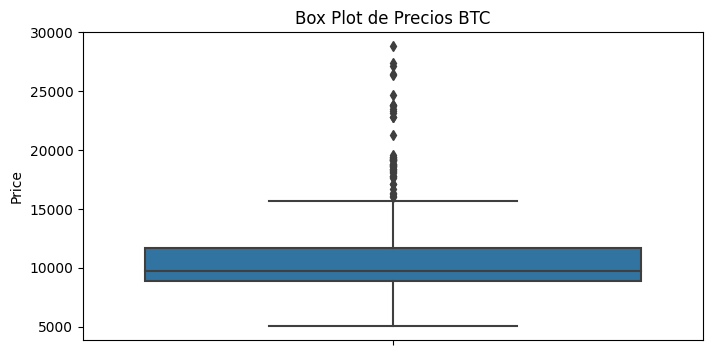

In [32]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_bt, y='price')
plt.title('Box Plot de Precios BTC')
plt.ylabel('Price')
plt.show()

TETHER

In [29]:
df_teth = pd.read_csv('PreciosTether_2020a2021.csv')

In [30]:
# Busco si hay valores faltantes:
print(df_teth.isnull().sum())

# Medidas Estadísticas Generales:
estats = df_teth['price'].describe()
print(estats)

timestamp    0
price        0
dtype: int64
count    366.000000
mean       0.999836
std        0.002087
min        0.980000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.010000
Name: price, dtype: float64


In [31]:
df_teth['price'] = pd.to_numeric(df_teth['price'], errors='coerce')

# Calcular estadísticas descriptivas para identificar valores atípicos
stats_teth = df_teth['price'].describe()
Q1 = stats_teth['25%']
Q3 = stats_teth['75%']
IQR = Q3 - Q1

# Calcular los límites superior e inferior para detectar valores atípicos
lower_bound_teth = Q1 - 1.5 * IQR
upper_bound_teth = Q3 + 1.5 * IQR

# Identificar y filtrar valores atípicos
outliers_teth = df_teth[(df_bt['price'] < lower_bound_teth) | (df_teth['price'] > upper_bound_teth)]

print(lower_bound_teth)
print(upper_bound_teth)
print(outliers_teth.count())

1.0
1.0
timestamp    4
price        4
dtype: int64


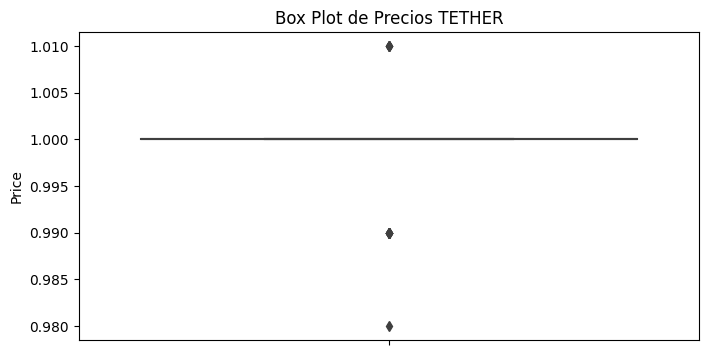

In [33]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_teth, y='price')
plt.title('Box Plot de Precios TETHER')
plt.ylabel('Price')
plt.show()

Vemos que casi todos los valores se encuentran en 1. Eso es porque se trata de una STABLECOIN, carece de volatilidad. La principal característica de las stablecoins es su estabilidad de valor. A diferencia de otras criptomonedass que pueden experimentar cambios drásticos en su precio en cortos períodos de tiempo, las stablecoins se diseñan para mantener un valor más constante, a menudo vinculado a una moneda como el USD o el EUR.

VOLUMEN

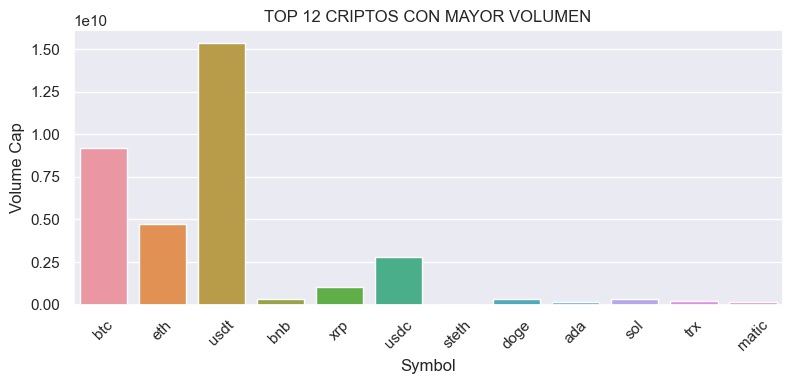

In [36]:
df_vol_sorted = df_cap.sort_values(by="total_volume", ascending=False)

top_12vol = df_vol_sorted.head(12)

sns.set(style="darkgrid")

plt.figure(figsize=(8, 4))
sns.barplot(x='symbol', y="total_volume", data=top_12)
plt.xlabel('Symbol')
plt.ylabel('Volume Cap')
plt.title('TOP 12 CRIPTOS CON MAYOR VOLUMEN')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [24]:
dfcot= pd.read_excel("Libro1.xlsx")

dfcot.drop(columns=["Unnamed: 0", "Unnamed: 1"], inplace=True)

nuevos_nombres = ["Bitcoin", "Ethereum", "Cardano", "Decentraland", "Monero"]
dfcot.columns = nuevos_nombres


In [25]:
nuevos_nombres = ["Bitcoin", "Ethereum", "Cardano", "Decentraland", "Monero"]
dfcot.columns = nuevos_nombres
dfcot = dfcot.drop(0, axis=0)
dfcot.head()

,Bitcoin,Ethereum,Cardano,Decentraland,Monero
1,14093.61,776.08,0.75,0.1,357.18
2,15321.93,876.89,0.81,0.11,376.53
3,15583.89,963.06,1.08,0.16,395.26
4,15976.37,978.42,1.18,0.21,415.03
5,18336.92,1004.89,1.08,0.18,402.51


In [26]:
correlation_matrix = dfcot.corr()

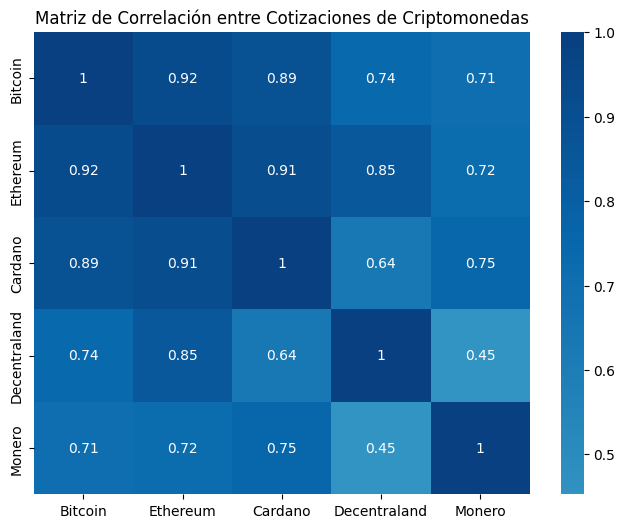

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="GnBu", center=0)
plt.title("Matriz de Correlación entre Cotizaciones de Criptomonedas")
plt.show()

Bitcoin, Ethereum y Cardano tienen una correlación positiva muy significativa. Esto significa que, en general, cuando el precio de Bitcoin sube, es probable que el precio de Ethereum y Cardano también suba.

Para la elección de las monedas que van a entrar en la cartera, me voy a basar en indicadores como la capitalización de mercado, el volumen, correlación lineal,estabilidad, liquidez, participación de mercado y madurez (aunque estas se relacionan bastante con los 2 primeros indicadores mencionados).
Y por útlimo el potencial crecimiento a largo plazo, pero esto más que nada sustentado en los proyectos que ofrece cada una.